In [1]:
# Program to generate Word Cloud

# import all necessary modules
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl


Bad key text.latex.preview in file /Users/patrickthornquist/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/patrickthornquist/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/patrickthornquist/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mpls

In [2]:
# Read CSV File
import os
df = pd.read_csv("tweets_NIO.csv", index_col=0)
# read the whole text

In [3]:
# read the mask/color image taken from
#coloring = np.array(Image.open('.jpg'))
stopwords = set(STOPWORDS)
custom_stop_words = ["https", "AMC", "FB", "t", "hr", "will", "AMZN", "NFLX", "week", "F", "article", "now", "MSFT", "AAPL", "last", "co", "tickers","GME", "going", "ticker", "mentions", "day", "see", "SPY", "QQQ", "Count", "mention"]
[stopwords.add(n) for n in custom_stop_words]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [4]:
all_text = " ".join(df['Tweet'])

In [5]:
wordcloud = WordCloud(stopwords = stopwords, max_words=150, collocations=False, background_color = "white").generate(all_text)

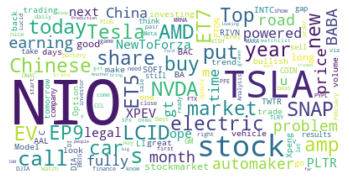

In [6]:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [7]:
wordcloud.to_file("nio_wordcloud.png")

In [8]:
# make car photo

nio_car = np.array(Image.open("car2.png"))
nio_car

array([[255, 255, 255, ..., 222, 255, 255],
       [255, 255, 255, ..., 222, 255, 255],
       [255, 255, 255, ..., 222, 255, 255],
       ...,
       [227, 227, 227, ..., 251, 235, 226],
       [255, 255, 255, ..., 235, 250, 255],
       [255, 255, 255, ..., 227, 255, 255]], dtype=uint8)

In [22]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [20]:
transformed_nio_car = np.ndarray((nio_car.shape[0],nio_car.shape[1]), np.int32)

for i in range(len(nio_car)):
    transformed_nio_car[i] = list(map(transform_format, nio_car[i]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [21]:
transformed_nio_car

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

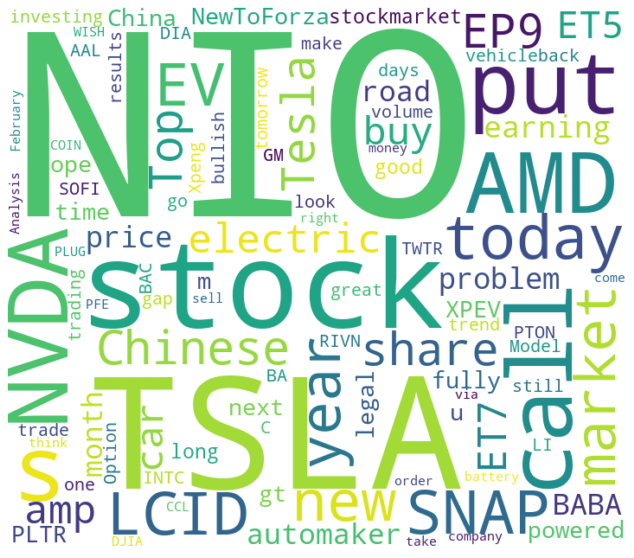

In [14]:
wc = WordCloud(stopwords = stopwords, max_words=100, collocations=False, background_color = "white", mask=transformed_nio_car, contour_width=3, contour_color="green")

wc.generate(all_text)

wc.to_file("nio_car_wordcloud.png")

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()